In [1]:
#Code can be divided into a few parts....
#1-Combine 
#2-Changing mask pixel values (labels) from 4 to 3 (as the original labels are 0, 1, 2, 4)
#3-Visualize
import numpy as np
import nibabel as nib
import os 
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imsave

from sklearn.preprocessing import MinMaxScaler

In [2]:
scaler = MinMaxScaler()
TRAIN_DATASET_PATH = 'C:/Users/c21097211/Desktop/Bratsdataset/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/'
# VALIDATION_DATASET_PATH = 'dataset/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData/'

test_image_flair=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_flair.nii').get_fdata()
print(test_image_flair.max())
#Scalers are applied to 1D so let us reshape and then reshape back to original shape. 
test_image_flair=scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)


test_image_t1=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t1.nii').get_fdata()
test_image_t1=scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)

test_image_t1ce=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t1ce.nii').get_fdata()
test_image_t1ce=scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)

test_image_t2=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t2.nii').get_fdata()
test_image_t2=scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)

test_mask=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_seg.nii').get_fdata()
test_mask=test_mask.astype(np.uint8)

1854.603271484375


In [3]:
print(np.unique(test_mask))  #0, 1, 2, 4 (Need to reencode to 0, 1, 2, 3)
#Reassign mask values 2 to 1
test_mask[test_mask==4] = 3  #Reassign mask values 4 to 1
print(np.unique(test_mask)) 

[0 1 2 4]
[0 1 2 3]


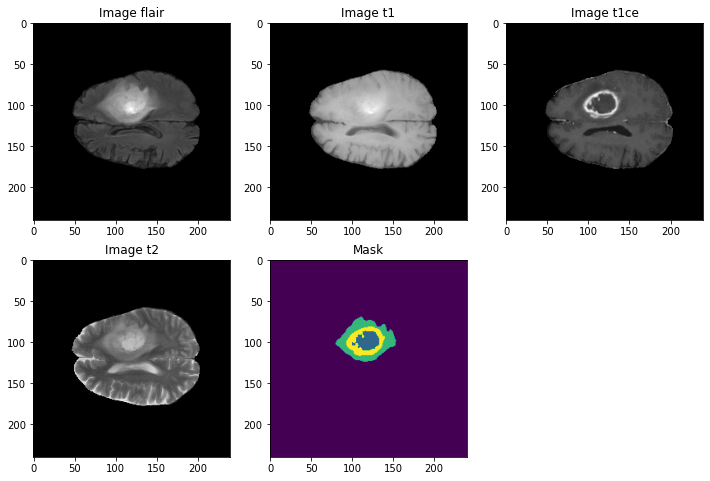

In [4]:
import random
#n_slice=random.randint(0, test_mask.shape[2])
n_slice=90
plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(test_image_flair[:,:,n_slice], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(test_image_t1[:,:,n_slice], cmap='gray')
plt.title('Image t1')
plt.subplot(233)
plt.imshow(test_image_t1ce[:,:,n_slice], cmap='gray')
plt.title('Image t1ce')
plt.subplot(234)
plt.imshow(test_image_t2[:,:,n_slice], cmap='gray')
plt.title('Image t2')
plt.subplot(235)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()


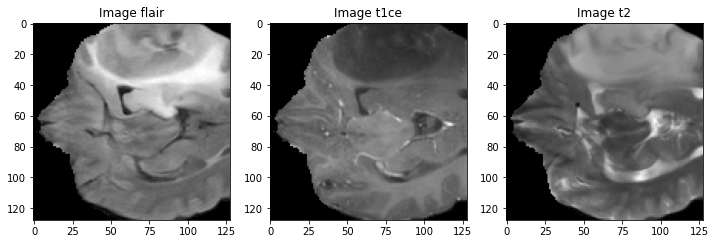

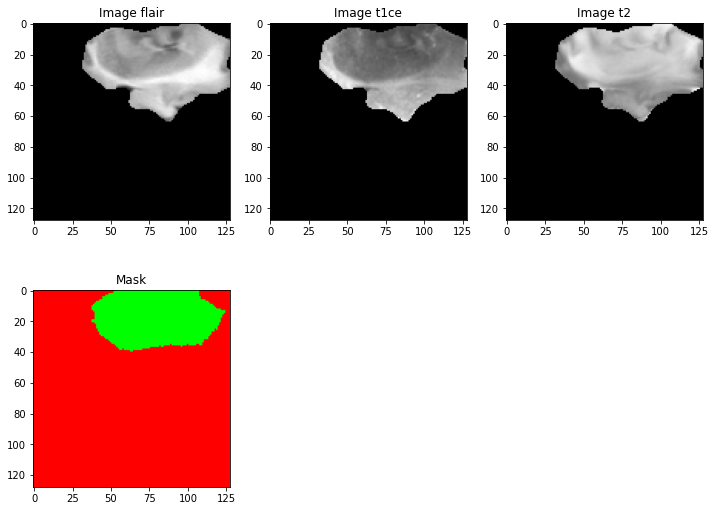

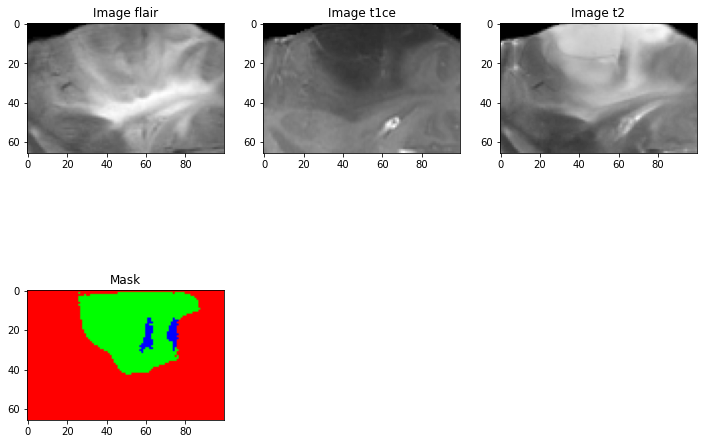

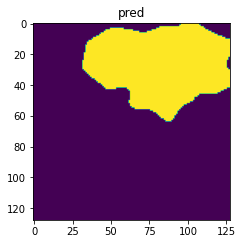

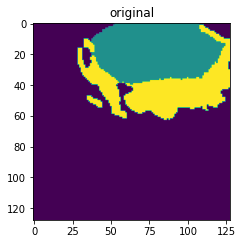

(128, 128, 128, 3)
(128, 128, 128, 3)
(128, 128, 128, 1)
(128, 128, 128)


In [5]:
#Try images:
from keras.models import load_model
import numpy as np


test_img = np.load("/Users/c21097211/Desktop/Bratsdataset/part23channel/val/train322/image_322.npy")

test_mask = np.load("/Users/c21097211/Desktop/Bratsdataset/part23channel/val/train322/mask_322.npy")
#test_mask_argmax=np.argmax(test_mask, axis=3)

test_pred = np.load("/Users/c21097211/Desktop/Bratsdataset/part23channel/val/train322/predicted_mask_322.npy")
        
        
ptsx,ptsy,ptsz=np.where(test_pred >0)
xmin,xmax,ymin,ymax,zmin,zmax=ptsx.min(),ptsx.max(),ptsy.min(),ptsy.max(),ptsz.min(),ptsz.max()  
m2 = test_mask[xmin:xmax,ymin:ymax,zmin:zmax]
m1 = test_img[xmin:xmax,ymin:ymax,zmin:zmax]

original= np.load("C:/Users/c21097211/Desktop/Bratsdataset/BraTS2020_TrainingData/input_data_3channels/masks/mask_322.npy")
original=np.argmax(original, axis=3)
#test_pred_argmax=np.argmax(test_pred, axis=3)

test_pred=np.resize(test_pred,(test_pred.shape[0],test_pred.shape[1],test_pred.shape[2],1))
try1= test_img * test_pred
# print(test_prediction_argmax.shape)
# print(test_mask_argmax.shape)
# print(np.unique(test_prediction_argmax))







#n_slice=random.randint(0, test_mask.shape[2])
n_slice=45
plt.figure(figsize=(12, 9))
plt.subplot(231)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(233)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')




plt.figure(figsize=(12, 9))
plt.subplot(231)
plt.imshow(try1[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(try1[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(233)
plt.imshow(try1[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(234)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()
plt.figure




plt.figure(figsize=(12, 9))
plt.subplot(231)
plt.imshow(m1[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(m1[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(233)
plt.imshow(m1[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(234)
plt.imshow(m2[:,:,n_slice])
plt.title('Mask')
plt.show()
plt.figure

n_slice=45
plt.figure(figsize=(12, 9))
plt.subplot(235)
plt.imshow(test_pred[:,:,n_slice])
plt.title('pred')
plt.show() 
n_slice=45
plt.figure(figsize=(12, 9))
plt.subplot(235)
plt.imshow(original[:,:,n_slice])
plt.title('original')
plt.show() 


print(test_img.shape)
print(test_mask.shape)
print(test_pred.shape)
print(original.shape)



In [5]:
import glob
import numpy as np
import tensorflow as tf
from skimage.transform import resize
def load_img_mask(img_mask_list):
 


    images=[]
    
    masks=[]
#     masks=np.zeros([80,80,80,len(img_mask_list)],dtype=np.float64)
    for i, dir_name in enumerate(img_mask_list):  

        
       original_image = np.load(glob.glob(dir_name+'/'+'image_*.npy')[0])

       original_mask  =  np.load(glob.glob(dir_name+'/'+'mask_*.npy')[0])



       predicted_mask =  np.load(glob.glob(dir_name+'/'+'predicted_mask_*.npy')[0])


        
       ptsx,ptsy,ptsz=np.where(predicted_mask >0)
       xmin,xmax,ymin,ymax,zmin,zmax=ptsx.min(),ptsx.max(),ptsy.min(),ptsy.max(),ptsz.min(),ptsz.max()  
        
       #crop=  predicted_mask[xmin:xmax,ymin:ymax]
    
       #crop2 = np.resize(crop,(crop.shape[0],crop.shape[1],crop.shape[2],1))
    
       m2 = original_mask[xmin:xmax,ymin:ymax,zmin:zmax]
        
       mask_=resize(m2,(80,80,128))

#        print("new",m2.shape)


       
       image = original_image[xmin:xmax,ymin:ymax,zmin:zmax]
       image_=resize(image,(80,80,128),mode='constant',preserve_range=True)
    
    
       masks.append(mask_)

       images.append(image_)

    images = tf.convert_to_tensor(np.array(images))
    masks = tf.convert_to_tensor(np.array(masks))
    
    return(images,masks)

In [6]:
def imageLoader(path, batch_size):
    
    img_mask_list=glob.glob(path+'/*')

    L = len(img_mask_list)

    #keras needs the generator infinite, so we will use while true  
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)
                       
            X,Y = load_img_mask( img_mask_list[batch_start:limit])
           

            yield (X,Y) #a tuple with two numpy arrays with batch_size samples     

            batch_start += batch_size   
            batch_end += batch_size

In [ ]:
import glob
import os 
train_path="C:/Users/c21097211/Desktop/part23channel/train"
val_path="C:/Users/c21097211/Desktop/part23channel/val"

batch_size=1
train_img_datagen1=imageLoader(train_path,batch_size)
val_img_datagen1=imageLoader(val_path,batch_size)

train_img_list= os.listdir(train_path)
val_img_list= os.listdir(val_path)
#To verify generator 
imgt, mskt = train_img_datagen1.__next__()
imgv, mskv = val_img_datagen1.__next__()


In [ ]:
# To Test Output of the Generator
import matplotlib.pyplot as plt
import random
img_num = random.randint(0,imgt.shape[0]-1)
test_img=imgt[img_num]
c=mskt[img_num]
test_mask=np.argmax(c, axis=3)
n_slice=60


plt.subplot(231)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(233)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(234)

plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()


# To Test Output of the Generator
import matplotlib.pyplot as plt
import random
img_num = random.randint(0,imgv.shape[0]-1)
test_img=imgv[img_num]
c=mskv[img_num]
test_mask=np.argmax(c, axis=3)
n_slice=60
plt.subplot(231)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(233)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(234)

plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [8]:
#Build the model
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Reshape, Dense, Conv3D, BatchNormalization, UpSampling3D, AveragePooling3D, MaxPooling3D, concatenate, GlobalAveragePooling3D, Conv3DTranspose, BatchNormalization, Dropout, Lambda
from keras import regularizers
from tensorflow.keras.optimizers import Adam
from keras.metrics import MeanIoU
Lrelu = tf.keras.layers.LeakyReLU(alpha=0.1)
from tensorflow_addons.layers import InstanceNormalization
from tensorflow.python.keras.layers import Dropout, SpatialDropout3D
'''
A transition layer is used to control the complexity of the model. 
It reduces the number of channels by using an 1*1 convolution. 
Moreover, it halves the height and width via average pooling with a stride of 2.
'''     
def SqueezeAndExcitation(inputs, ratio=8):
    b,_, _, _,c= inputs.shape
    x = GlobalAveragePooling3D()(inputs)
    x = Dense(c//ratio, activation="relu", use_bias=False)(x)
    x = Dense(c, activation="sigmoid", use_bias=False)(x)
    x = inputs * x
    return x

def TransitionBlock(inputs):
        b,_, _, _,c= inputs.shape
        x = BatchNormalization()(inputs)
        x = tf.keras.layers.ReLU()(x)
        x = tf.keras.layers.Conv3D(c, kernel_size=1)(x)
        x = tf.keras.layers.AvgPool3D(pool_size=2, strides=2)(x)
        return x
     
def CNN_Model(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS, num_classes):
    kernel_initializer =  'he_uniform'
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs
    
    conv = Conv3D(32, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(s)
    conv1 = Conv3D(32, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(conv)
    B1= InstanceNormalization(axis=-1)(conv1)
    conv1 = Conv3D(32, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(B1)
    pool1 = MaxPooling3D((2, 2, 2))(conv1)
   
    # 3x3 conv
    conv2 = Conv3D(32, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(conv)
    B2= InstanceNormalization(axis=-1)(conv2)
    conv2 = Conv3D(32, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(B2)
    s2= SpatialDropout3D(0.3)(conv2)
    pool2 = MaxPooling3D((2, 2, 2))(s2)

    # 5x5 conv
    conv3 = Conv3D(32, (5, 5, 5), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(conv)
    B3= InstanceNormalization(axis=-1)(conv3)
    conv3 = Conv3D(32, (5, 5, 5), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(B3)
    s3= SpatialDropout3D(0.3)(conv3)
    # 3x3 max pooling
    pool3 = MaxPooling3D((3, 3, 3), strides=(1,1,1), padding='same')(s3)

   
    # concatenate filters, assumes filters/channels last
    layer_out = concatenate([conv1  , conv2, conv3], axis=-1)
    Bo= InstanceNormalization(axis=-1)(layer_out)
    poolo = MaxPooling3D((2, 2, 2))(Bo)  
    drop1 = SpatialDropout3D(0.3)(poolo)
   
    conv4 = Conv3D(64, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(drop1)
    B4= InstanceNormalization(axis=-1)(conv4)
    conv4 = Conv3D(64, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(B4)
    B4= InstanceNormalization(axis=-1)(conv4)
    pool4= MaxPooling3D((2, 2, 2))(B4)  
    drop2 = SpatialDropout3D(0.3)(pool4) 
   
    attention_layer1 = SqueezeAndExcitation( drop2)
    print("-----------------------------------------------------------")
    print(attention_layer1)
    print("-----------------------------------------------------------")

    tranisition_layer1 = TransitionBlock(attention_layer1)
    print("-----------------------------------------------------------")
    print(tranisition_layer1)
    print("-----------------------------------------------------------")

    
    conv6 = Conv3D(128, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(tranisition_layer1)
    B6 = InstanceNormalization(axis=-1)(conv6)
    conv6 = Conv3D(128, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(B6)
    B6= InstanceNormalization(axis=-1)(conv6)
    pool6= MaxPooling3D((2, 2, 2))(B6)  
    drop4 = SpatialDropout3D(0.3)(pool6) 

#Upsampling 
                                                                                                  

    u8 = Conv3D(256, (2, 2, 2), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(UpSampling3D(size =(2,2,2))(drop4))                                                                                                  
    c8 = InstanceNormalization(axis=-1)(u8)
    c8 = Conv3D(256, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(u8)
    c8 = SpatialDropout3D(0.3)(c8)
    c8 = Conv3D(256, (3,3, 3), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(c8)
                                                                                                         
    u9 = Conv3D(128, (2, 2, 2), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(UpSampling3D(size =(2,2,2))(c8))
    c9 = InstanceNormalization(axis=-1)(u9)
    c9 = Conv3D(128, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer, 
                kernel_regularizer=regularizers.l2(0.02), padding='same')(u9)
    c9 = SpatialDropout3D(0.3)(c9)
    c9 = Conv3D(128, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer, 
                 kernel_regularizer=regularizers.l2(0.02), padding='same')(c9)

    u10= Conv3D(64, (2, 2, 2), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(UpSampling3D(size =(2,2,2))(c9))
    c10 = InstanceNormalization(axis=-1)(u10)
    c10= Conv3D(64, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer,
              kernel_regularizer=regularizers.l2(0.02), padding='same')(u10)
    c10 = SpatialDropout3D(0.3)(c10)                                                                                               
    c10= Conv3D(64, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer,
                 kernel_regularizer=regularizers.l2(0.02), padding='same')(c10)
    
    u11= Conv3D(32, (2, 2, 2), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(UpSampling3D(size =(2,2,2))(c10))
    c11 = InstanceNormalization(axis=-1)(u11)
    c11= Conv3D(32, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer,
              kernel_regularizer=regularizers.l2(0.02), padding='same')(u11)
    c11 = SpatialDropout3D(0.3)(c11)                                                                                               
    c11= Conv3D(32, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer,
                 kernel_regularizer=regularizers.l2(0.02), padding='same')(c11)
                                                                               
                                                                                                       
                                                                            
                       
    outputs = Conv3D(num_classes, (1, 1, 1), kernel_regularizer=regularizers.l2(0.02),activation='softmax')(c11)

    model = Model(inputs=[inputs], outputs=[outputs])
    #compile model outside of this function to make it flexible.

    return model                
                     

#Test if everything is working ok.
model = CNN_Model(80, 80, 128, 3, 4)


model.summary() 
print(model.input_shape)
print(model.output_shape)

-----------------------------------------------------------
KerasTensor(type_spec=TensorSpec(shape=(None, 20, 20, 32, 64), dtype=tf.float32, name=None), name='tf.math.multiply/Mul:0', description="created by layer 'tf.math.multiply'")
-----------------------------------------------------------
-----------------------------------------------------------
KerasTensor(type_spec=TensorSpec(shape=(None, 10, 10, 16, 64), dtype=tf.float32, name=None), name='average_pooling3d/AvgPool3D:0', description="created by layer 'average_pooling3d'")
-----------------------------------------------------------
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 80, 80, 128  0           []                               
                                , 3)]                                                     

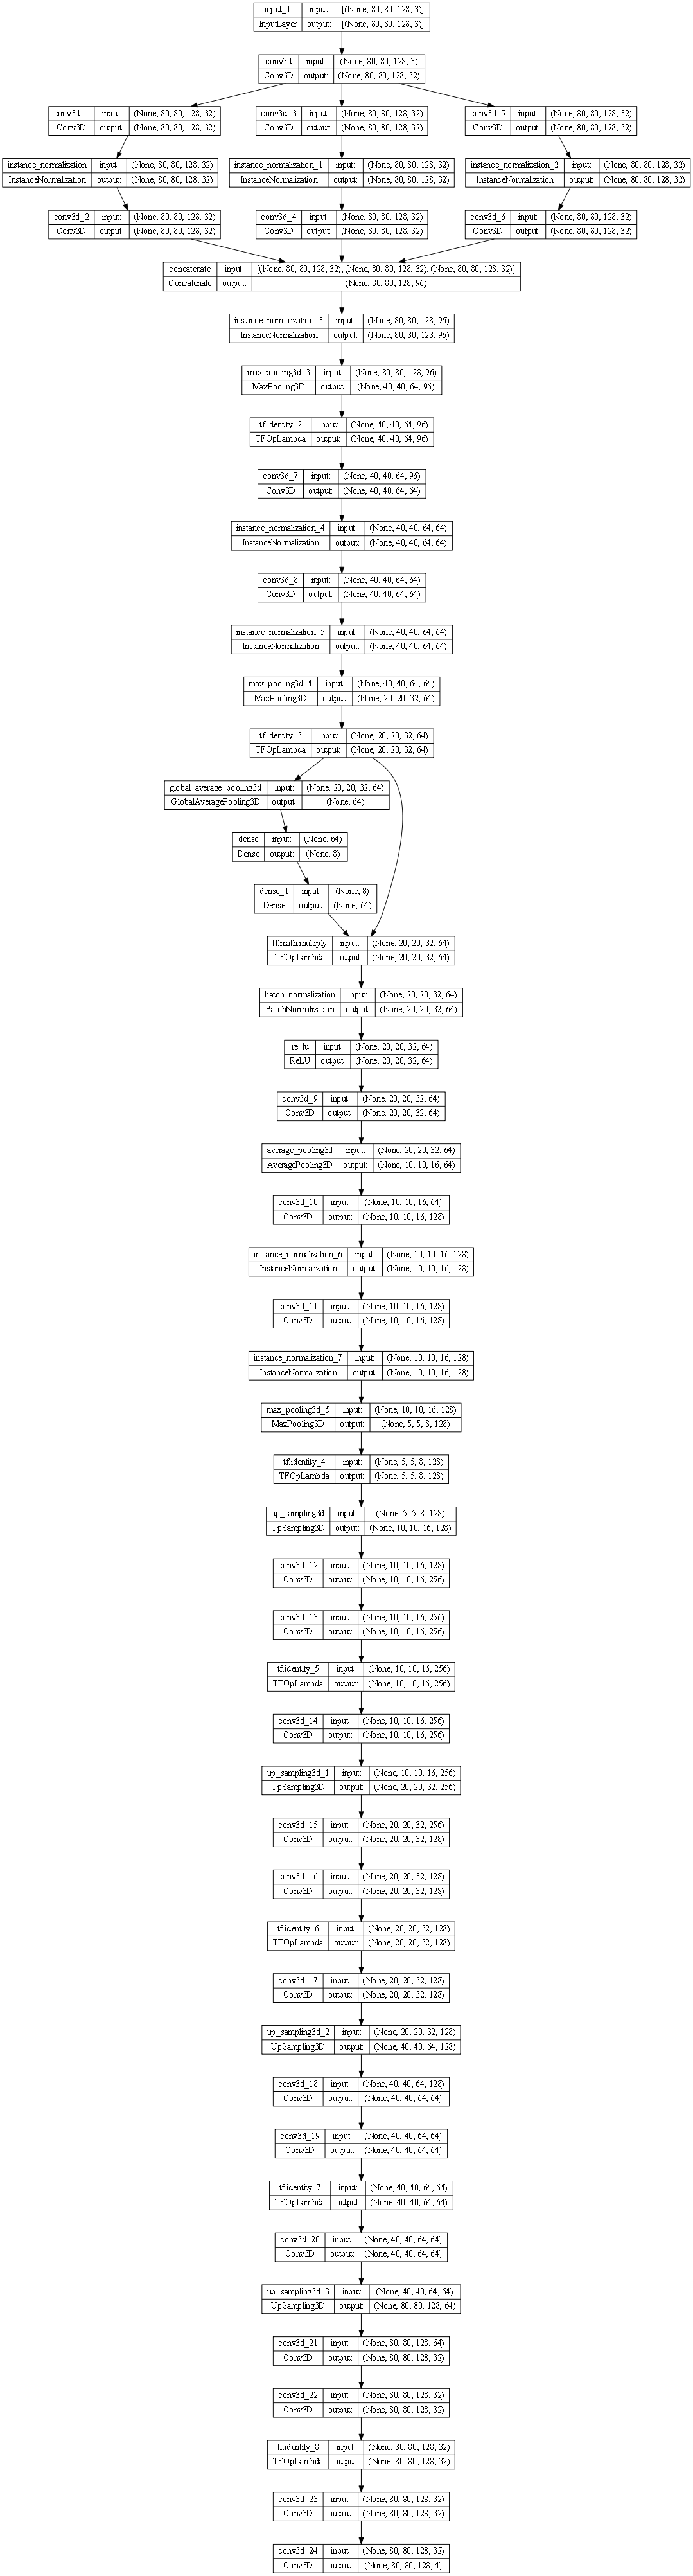

In [9]:
from tensorflow.keras.utils import plot_model
plot_model(model, 
           show_shapes = True,
           show_dtype = False,
           show_layer_names = True, 
           rankdir = 'TB', 
           expand_nested = False, 
           dpi = 70)


In [21]:
#Define loss, metrics and optimizer to be used for training
import keras
import keras.backend as K
def dice(y_true, y_pred):
    #computes the dice score on two tensors

    sum_p=K.sum(y_pred,axis=0)
    sum_r=K.sum(y_true,axis=0)
    sum_pr=K.sum(y_true * y_pred,axis=0)
    dice_numerator =2*sum_pr
    dice_denominator =sum_r+sum_p
    dice_score =(dice_numerator+K.epsilon() )/(dice_denominator+K.epsilon())
    return dice_score


def dice_whole_metric(y_true, y_pred):
    #computes the dice for the whole tumor

    y_true_f = K.reshape(y_true,shape=(-1,4))
    y_pred_f = K.reshape(y_pred,shape=(-1,4))
    y_whole=K.sum(y_true_f[:,1:],axis=1)
    p_whole=K.sum(y_pred_f[:,1:],axis=1)
    dice_whole=dice(y_whole,p_whole)
    return dice_whole

def dice_en_metric(y_true, y_pred):
    #computes the dice for the enhancing region

    y_true_f = K.reshape(y_true,shape=(-1,4))
    y_pred_f = K.reshape(y_pred,shape=(-1,4))
    y_enh=y_true_f[:,-1]
    p_enh=y_pred_f[:,-1]
    dice_en=dice(y_enh,p_enh)
    return dice_en

def dice_core_metric(y_true, y_pred):
    ##computes the dice for the core region

    y_true_f = K.reshape(y_true,shape=(-1,4))
    y_pred_f = K.reshape(y_pred,shape=(-1,4))
    
#     workaround for tf
    y_core=K.sum(tf.gather(y_true_f, [1,3],axis =1),axis=1)
    p_core=K.sum(tf.gather(y_pred_f, [1,3],axis =1),axis=1)
    
#     y_core=K.sum(y_true_f[:,[1,3]],axis=1)
#     p_core=K.sum(y_pred_f[:,[1,3]],axis=1)
    dice_core=dice(y_core,p_core)
    return dice_core






In [22]:
import keras.backend as K
import numpy as np
import tensorflow as tf
from keras.losses import mean_squared_error


M_tree_4 = np.array([[0., 1., 1., 1.,],
                     [1., 0., 0.6, 0.5],
                     [1., 0.6, 0., 0.7],
                     [1., 0.5, 0.7, 0.]], dtype=np.float64)

def wasserstein_disagreement_map(prediction, ground_truth, M):
    """
    Function to calculate the pixel-wise Wasserstein distance between the
    flattened pred_proba and the flattened labels (ground_truth) with respect
    to the distance matrix on the label space M.
    :param prediction: the logits after softmax
    :param ground_truth: segmentation ground_truth
    :param M: distance matrix on the label space
    :return: the pixelwise distance map (wass_dis_map)
    """
    # pixel-wise Wassertein distance (W) between flat_pred_proba and flat_labels
    # wrt the distance matrix on the label space M
    n_classes = K.int_shape(prediction)[-1]
    # unstack_labels = tf.unstack(ground_truth, axis=-1)
    ground_truth = tf.cast(ground_truth, dtype=tf.float64)
    # unstack_pred = tf.unstack(prediction, axis=-1)
    prediction = tf.cast(prediction, dtype=tf.float64)
    # print("shape of M", M.shape, "unstacked labels", unstack_labels,
    #       "unstacked pred" ,unstack_pred)
    # W is a weighting sum of all pairwise correlations (pred_ci x labels_cj)
    pairwise_correlations = []
    for i in range(n_classes):
        for j in range(n_classes):
            pairwise_correlations.append(
                M[i, j] * tf.multiply(prediction[:,i], ground_truth[:,j]))
    wass_dis_map = tf.add_n(pairwise_correlations)
    return wass_dis_map

def generalised_wasserstein_dice_loss(y_true, y_predicted ):
    """
    Function to calculate the Generalised Wasserstein Dice Loss defined in
    Fidon, L. et. al. (2017) Generalised Wasserstein Dice Score for Imbalanced
    Multi-class Segmentation using Holistic Convolutional Networks.
    MICCAI 2017 (BrainLes)

    :param prediction: the logits (before softmax)
    :param ground_truth: the segmentation ground_truth
    :param weight_map:
    :return: the loss
    """
    # apply softmax to pred scores
    n_classes = K.int_shape(y_predicted)[-1]


    ground_truth = tf.cast(tf.reshape(y_true,(-1,n_classes)), dtype=tf.int64)
    pred_proba = tf.cast(tf.reshape(y_predicted,(-1,n_classes)), dtype=tf.float64)

    # M = tf.cast(M, dtype=tf.float64)
    # compute disagreement map (delta)
    M = M_tree_4
    # print("M shape is ", M.shape, pred_proba, one_hot)
    delta = wasserstein_disagreement_map(pred_proba, ground_truth, M)
    # compute generalisation of all error for multi-class seg
    all_error = tf.reduce_sum(delta)
    # compute generalisation of true positives for multi-class seg
    one_hot = tf.cast(ground_truth, dtype=tf.float64)
    true_pos = tf.reduce_sum(
        tf.multiply(tf.constant(M[0, :n_classes], dtype=tf.float64), one_hot),
        axis=1)
    true_pos = tf.reduce_sum(tf.multiply(true_pos, 1. - delta), axis=0)
    WGDL = 1. - (2. * true_pos) / (2. * true_pos + all_error)

    return tf.cast(WGDL, dtype=tf.float32)

In [23]:
import tensorflow as tf
import segmentation_models_3D as sm
metrics = ['accuracy',dice_whole_metric, dice_en_metric,dice_core_metric]

LR = 0.0001
optim = tf.keras.optimizers.Adam(LR)

In [24]:
#Fit the model 

steps_per_epoch = len(train_img_list)//batch_size
val_steps_per_epoch = len(val_img_list)//batch_size

model =  CNN_Model(IMG_HEIGHT=80, 
                          IMG_WIDTH=80, 
                          IMG_DEPTH=128, 
                          IMG_CHANNELS=3, 
                          num_classes=4)

model.compile(optimizer = optim, loss=generalised_wasserstein_dice_loss, metrics=metrics)
print(model.summary())
print(model.input_shape)
print(model.output_shape)

checkpoint_filepath = 'C:/Users/c21097211/Desktop/part23channel/part23cnn3-{epoch:03d}-{val_dice_en_metric:.04f}.hdf5' # use your path 

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                               monitor='val_dice_en_metric', verbose=1,
                                                               save_best_only=True, mode='max')

history=model.fit(train_img_datagen1,
          steps_per_epoch=steps_per_epoch,
          epochs=150,
          verbose=1,
          validation_data=val_img_datagen1,
          validation_steps=val_steps_per_epoch,
          callbacks=[model_checkpoint_callback])

np.save('part23cnn66_history.npy',history.history)
model.save('part23cnn66.hdf5')

-----------------------------------------------------------
KerasTensor(type_spec=TensorSpec(shape=(None, 20, 20, 32, 64), dtype=tf.float32, name=None), name='tf.math.multiply_3/Mul:0', description="created by layer 'tf.math.multiply_3'")
-----------------------------------------------------------
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 80, 80, 128  0           []                               
                                , 3)]                                                             
                                                                                                  
 conv3d_69 (Conv3D)             (None, 80, 80, 128,  2624        ['input_4[0][0]']                
                                 32)                                                      

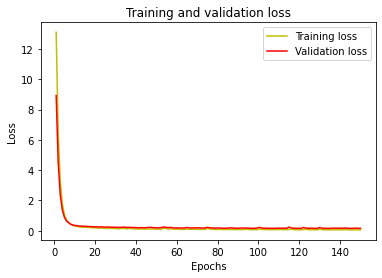

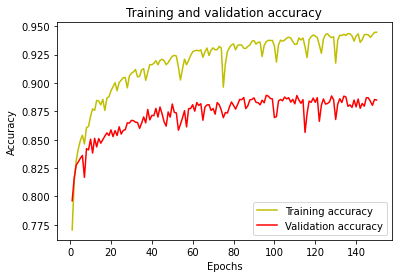

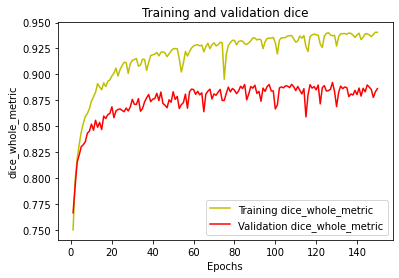

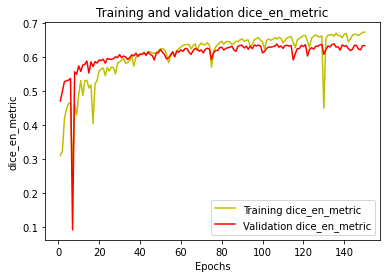

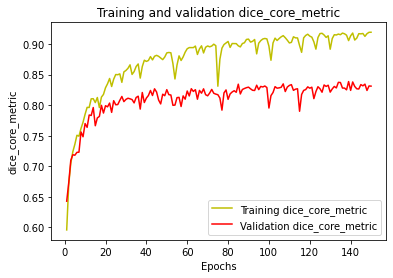

In [25]:
#plot the training and validation IoU and loss at each epoch
import numpy as np
import os
import keras
from matplotlib import pyplot as plt
import glob
import random
from keras.models import load_model

#my_model = load_model('C:/Users/c21097211/part23cnn.hdf5', 
 #                     compile=False)

history=np.load('C:/Users/c21097211/part23cnn66_history.npy',allow_pickle='TRUE').item()

loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history['accuracy']
val_acc = history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

dice_whole_metric = history['dice_whole_metric']
val_dice_whole_metric = history['val_dice_whole_metric']

plt.plot(epochs, dice_whole_metric, 'y', label='Training dice_whole_metric')
plt.plot(epochs,val_dice_whole_metric, 'r', label='Validation dice_whole_metric')
plt.title('Training and validation dice')
plt.xlabel('Epochs')
plt.ylabel('dice_whole_metric')
plt.legend()
plt.show()

dice_en_metric = history['dice_en_metric']
val_dice_en_metric = history['val_dice_en_metric']

plt.plot(epochs, dice_en_metric, 'y', label='Training dice_en_metric')
plt.plot(epochs,val_dice_en_metric, 'r', label='Validation dice_en_metric')
plt.title('Training and validation dice_en_metric')
plt.xlabel('Epochs')
plt.ylabel('dice_en_metric')
plt.legend()
plt.show()


dice_core_metric = history['dice_core_metric']
val_dice_core_metric = history['val_dice_core_metric']

plt.plot(epochs, dice_core_metric, 'y', label='Training dice_core_metric')
plt.plot(epochs,val_dice_core_metric, 'r', label='Validation dice_core_metric')
plt.title('Training and validation dice_core_metric')
plt.xlabel('Epochs')
plt.ylabel('dice_core_metric')
plt.legend()
plt.show()





1/1 [==============================] - 1s 594ms/step


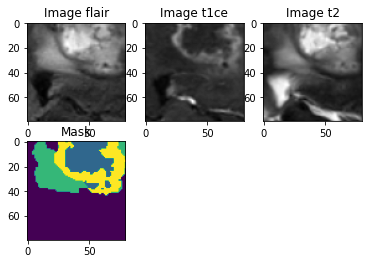

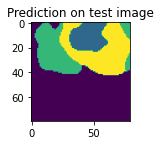

In [26]:
import glob
import os 
val_path="C:/Users/c21097211/Desktop/part23channel/val"

batch_size=8

val_img_datagen1=imageLoader(val_path,batch_size)


val_img_list= os.listdir(val_path)

imgv, mskv = val_img_datagen1.__next__()


img_num = random.randint(0,imgt.shape[0]-1)
test_img=imgv[img_num]
c=mskv[img_num]
test_mask=np.argmax(c, axis=3)




my_model = load_model('C:/Users/c21097211/part23cnn66.hdf5', 
                      compile=False)


test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = my_model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]


# print(test_prediction_argmax.shape)
# print(test_mask_argmax.shape)
# print(np.unique(test_prediction_argmax))


#Plot individual slices from test predictions for verification
from matplotlib import pyplot as plt
import random

#n_slice=random.randint(0, test_prediction_argmax.shape[2])
n_slice=50
plt.subplot(231)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(233)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(234)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

plt.subplot(235)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:, n_slice])
plt.show()

In [ ]:
import glob
import numpy as np
import tensorflow as tf
from skimage.transform import resize
import numpy as np
import os
import keras
from matplotlib import pyplot as plt
import random
from keras.models import load_model

original_image =np.load("C:/Users/c21097211/Desktop/part23channel/val/train21/image_21.npy")
original_mask  = np.load("C:/Users/c21097211/Desktop/part23channel/val/train21/mask_21.npy")
predicted_mask = np.load("C:/Users/c21097211/Desktop/part23channel/val/train21/predicted_mask_21.npy")
test_mask=np.argmax(original_mask, axis=3)
print(original_image.shape)
print(original_mask.shape)
print(predicted_mask.shape)


ptsx,ptsy,ptsz=np.where(predicted_mask >0)
xmin,xmax,ymin,ymax,zmin,zmax=ptsx.min(),ptsx.max(),ptsy.min(),ptsy.max(),ptsz.min(),ptsz.max()  
m2 = test_mask[xmin:xmax,ymin:ymax,zmin:zmax]
        
mask_=resize(m2,(80,80,128))

       
image = original_image[xmin:xmax,ymin:ymax,zmin:zmax]
image_=resize(image,(80,80,128),mode='constant',preserve_range=True)
    


my_model = load_model('C:/Users/c21097211/part23cnn66.hdf5', 
                      compile=False)


test_img_input = np.expand_dims(image_, axis=0)
test_prediction = my_model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]


# print(test_prediction_argmax.shape)
# print(test_mask_argmax.shape)
# print(np.unique(test_prediction_argmax))


#Plot individual slices from test predictions for verification
from matplotlib import pyplot as plt
import random

#n_slice=random.randint(0, test_prediction_argmax.shape[2])
n_slice=50
plt.subplot(231)
plt.imshow(image_[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(image_[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(233)
plt.imshow(image_[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(234)
plt.imshow(mask_[:,:,n_slice])
plt.title('Mask')
plt.show()

plt.subplot(235)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:, n_slice])
plt.show()


In [ ]:
import glob
import numpy as np
import tensorflow as tf
from skimage.transform import resize
import numpy as np
import os
import keras
from matplotlib import pyplot as plt
import random
from keras.models import load_model

original_image =np.load("C:/Users/c21097211/Desktop/part23channel/val/train277/image_277.npy")
original_mask  = np.load("C:/Users/c21097211/Desktop/part23channel/val/train277/mask_277.npy")
predicted_mask = np.load("C:/Users/c21097211/Desktop/part23channel/val/train277/predicted_mask_277.npy")

print(original_image.shape)
print(original_mask.shape)
print(predicted_mask.shape)


ptsx,ptsy,ptsz=np.where(predicted_mask >0)
xmin,xmax,ymin,ymax,zmin,zmax=ptsx.min(),ptsx.max(),ptsy.min(),ptsy.max(),ptsz.min(),ptsz.max()  
m2 = predicted_mask[xmin:xmax,ymin:ymax,zmin:zmax]
        
mask_=resize(m2,(80,80,128))

       
image = original_image[xmin:xmax,ymin:ymax,zmin:zmax]
image_=resize(image,(80,80,128),mode='constant',preserve_range=True)
    


my_model = load_model('C:/Users/c21097211/part23cnn66.hdf5', 
                      compile=False)


test_img_input = np.expand_dims(image_, axis=0)
test_prediction = my_model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:]


# print(test_prediction_argmax.shape)
# print(test_mask_argmax.shape)
# print(np.unique(test_prediction_argmax))


#Plot individual slices from test predictions for verification
from matplotlib import pyplot as plt
import random

#n_slice=random.randint(0, test_prediction_argmax.shape[2])
n_slice=50
plt.subplot(231)
plt.imshow(image_[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(image_[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(233)
plt.imshow(image_[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(234)
plt.imshow(mask_[:,:,n_slice])
plt.title('Mask')
plt.show()

plt.subplot(235)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:, n_slice])
plt.show()

(128, 128, 128, 3)
(128, 128, 128, 4)
(128, 128, 128)


In [ ]:
import glob
import numpy as np
import tensorflow as tf
from skimage.transform import resize
import numpy as np
import os
import keras
from matplotlib import pyplot as plt
import random
from keras.models import load_model

original_image =np.load("C:/Users/c21097211/Desktop/part23channel/val/train303/image_303.npy")
original_mask  = np.load("C:/Users/c21097211/Desktop/part23channel/val/train303/mask_303.npy")
predicted_mask = np.load("C:/Users/c21097211/Desktop/part23channel/val/train303/predicted_mask_303.npy")

print(original_image.shape)
print(original_mask.shape)
print(predicted_mask.shape)


ptsx,ptsy,ptsz=np.where(predicted_mask >0)
xmin,xmax,ymin,ymax,zmin,zmax=ptsx.min(),ptsx.max(),ptsy.min(),ptsy.max(),ptsz.min(),ptsz.max()  
m2 = original_mask[xmin:xmax,ymin:ymax,zmin:zmax]
        
mask_=resize(m2,(80,80,128))

       
image = original_image[xmin:xmax,ymin:ymax,zmin:zmax]
image_=resize(image,(80,80,128),mode='constant',preserve_range=True)
    


my_model = load_model('C:/Users/c21097211/part23cnn66.hdf5', 
                      compile=False)


test_img_input = np.expand_dims(image_, axis=0)
test_prediction = my_model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]


# print(test_prediction_argmax.shape)
# print(test_mask_argmax.shape)
# print(np.unique(test_prediction_argmax))


#Plot individual slices from test predictions for verification
from matplotlib import pyplot as plt
import random

#n_slice=random.randint(0, test_prediction_argmax.shape[2])
n_slice=70
plt.subplot(231)
plt.imshow(image_[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(image_[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(233)
plt.imshow(image_[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(234)
plt.imshow(mask_[:,:,n_slice])
plt.title('Mask')
plt.show()

plt.subplot(235)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:, n_slice])
plt.show()

(128, 128, 128, 3)
(128, 128, 128, 4)
(128, 128, 128)


1/1 [==============================] - 1s 571ms/step


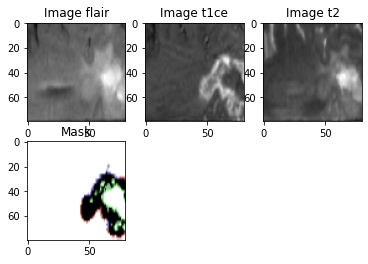

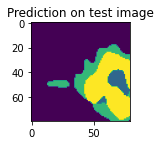

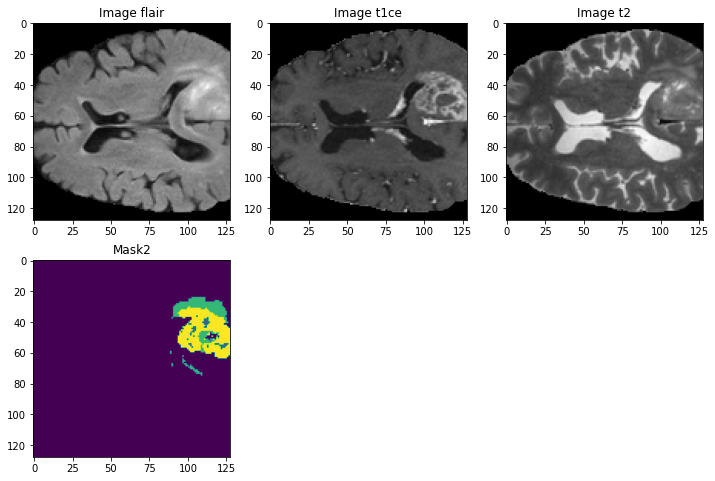

In [30]:
import glob
import numpy as np
import tensorflow as tf
from skimage.transform import resize
import numpy as np
import os
import keras
from matplotlib import pyplot as plt
import random
from keras.models import load_model

original_image =np.load("C:/Users/c21097211/Desktop/part23channel/val/train55/image_55.npy")
original_mask  = np.load("C:/Users/c21097211/Desktop/part23channel/val/train55/mask_55.npy")
predicted_mask = np.load("C:/Users/c21097211/Desktop/part23channel/val/train55/predicted_mask_55.npy")

print(original_image.shape)
print(original_mask.shape)
print(predicted_mask.shape)

test_mask=np.argmax(original_mask , axis=3)

ptsx,ptsy,ptsz=np.where(predicted_mask >0)
xmin,xmax,ymin,ymax,zmin,zmax=ptsx.min(),ptsx.max(),ptsy.min(),ptsy.max(),ptsz.min(),ptsz.max()  
m2 = original_mask[xmin:xmax,ymin:ymax,zmin:zmax]
        
mask_=resize(m2,(80,80,128))

       
image = original_image[xmin:xmax,ymin:ymax,zmin:zmax]
image_=resize(image,(80,80,128),mode='constant',preserve_range=True)
    


my_model = load_model('C:/Users/c21097211/part23cnn66.hdf5', 
                      compile=False)


test_img_input = np.expand_dims(image_, axis=0)
test_prediction = my_model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]

np.save('C:/Users/c21097211/Desktop/'+"/predicted_mask2_"+".npy",test_prediction_argmax)        


# print(test_prediction_argmax.shape)
# print(test_mask_argmax.shape)
# print(np.unique(test_prediction_argmax))


#Plot individual slices from test predictions for verification
from matplotlib import pyplot as plt
import random

#n_slice=random.randint(0, test_prediction_argmax.shape[2])
n_slice=60
plt.subplot(231)
plt.imshow(image_[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(image_[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(233)
plt.imshow(image_[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(234)
plt.imshow(mask_[:,:,n_slice])
plt.title('Mask')
plt.show()

plt.show()
plt.subplot(235)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:, n_slice])
plt.show()

plt.figure(figsize=(12, 8))

n_slice=70
plt.subplot(231)
plt.imshow(original_image[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(original_image[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(233)
plt.imshow(original_image[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(234)
plt.imshow(test_mask[:,:,70])
plt.title('Mask2')
plt.show()

In [25]:
predicted_mask = np.load("C:/Users/c21097211/Desktop/mask_55.npy")
print(predicted_mask.shape)

(128, 128, 128, 4)


In [35]:
import keras.backend as K
original_mask  =np.load("C:/Users/c21097211/Desktop/Bratsdataset/part23channel/train/train3/mask_3.npy")
n_slice=60

c=np.argmax(original_mask, axis=3)

y_true_f = tf.convert_to_tensor(c, 'float32')


y_core=K.sum(tf.gather(y_true_f, [1,2],axis =1),axis=1)

print(original_mask.shape)
print(y_true_f.shape)
print(y_core.shape)

y_true_f1 = tf.convert_to_tensor(original_mask, 'float32')
y_core1=K.sum(tf.gather(y_true_f1, [2],axis =1),axis=1)
p_enh=y_true_f1[:,-1]

print(y_true_f1.shape)
print(y_core1.shape)
print(p_enh.shape)

(128, 128, 128, 3)
(128, 128, 128)
(128, 128)
(128, 128, 128, 3)
(128, 128, 3)
(128, 128, 3)


In [ ]:
'''
import tensorflow as tf

from keras.models import Model
from keras.layers import Input, Reshape, Dense, Conv3D, BatchNormalization, UpSampling3D, MaxPooling3D, concatenate, GlobalAveragePooling3D, Conv3DTranspose, BatchNormalization, Dropout, Lambda
from keras import regularizers
from tensorflow.keras.optimizers import Adam
from keras.metrics import MeanIoU
Lrelu = tf.keras.layers.LeakyReLU(alpha=0.1)
from tensorflow_addons.layers import InstanceNormalization
from tensorflow.python.keras.layers import Dropout, SpatialDropout3D
################################################################################################################################    
def SqueezeAndExcitation(inputs, ratio=8):
    b,_, _, _,c= inputs.shape
    x = GlobalAveragePooling3D()(inputs)
    x = Dense(c//ratio, activation="relu", use_bias=False)(x)
    x = Dense(c, activation="sigmoid", use_bias=False)(x)
    x = inputs * x
    return x
################################################################################################################################
#def TransitionBlock(inputs):
       # b,_, _, _,c= inputs.shape
       # x = tf.keras.layers.BatchNormalization()(inputs)
      #  x = tf.keras.layers.ReLU()(x)
      #  x = tf.keras.layers.Conv3D(3, kernel_size=1)(x)
     #   x = tf.keras.layers.AvgPool3D(pool_size=2, strides=2)
      #  return x
     
###############################################################################################################################    
def CNN_Model(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS, num_classes):
    kernel_initializer =  'he_uniform'
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs
   
    conv = Conv3D(32, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(s)
    conv1 = Conv3D(32, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(conv)
    B1= InstanceNormalization(axis=-1)(conv1)
    conv1 = Conv3D(32, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(B1)
    pool1 = MaxPooling3D((2, 2, 2))(conv1)
   
    # 3x3 conv
    conv2 = Conv3D(32, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(conv)
    B2= InstanceNormalization(axis=-1)(conv2)
    conv2 = Conv3D(32, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(B2)
    B2= InstanceNormalization(axis=-1)(conv2)
    pool2 = MaxPooling3D((2, 2, 2))(B2)

    # 5x5 conv
    conv3 = Conv3D(64, (5, 5, 5), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(conv)
    B3= InstanceNormalization(axis=-1)(conv3)
    conv3 = Conv3D(64, (5, 5, 5), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(B3)
    B3= InstanceNormalization(axis=-1)(conv3)
    # 3x3 max pooling
    pool3 = MaxPooling3D((3, 3, 3), strides=(1,1,1), padding='same')(B3)

   
    # concatenate filters, assumes filters/channels last
    layer_out = concatenate([conv1  , conv2, conv3], axis=-1)
    Bo= InstanceNormalization(axis=-1)(layer_out)
    poolo = MaxPooling3D((2, 2, 2))(Bo)  
    drop1 = SpatialDropout3D(0.2)(poolo)
   
    conv4 = Conv3D(64, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(drop1)
    B4= InstanceNormalization(axis=-1)(conv4)
    conv4 = Conv3D(64, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(B4)
    B4= InstanceNormalization(axis=-1)(conv4)
    pool4= MaxPooling3D((2, 2, 2))(B4)  

   
    attention_layer1 = SqueezeAndExcitation( pool4)
    print("-----------------------------------------------------------")
    print(attention_layer1)
    print("-----------------------------------------------------------")
    #transition_layer1=TransitionBlock(attention_layer1)

    conv5= Conv3D(128, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(attention_layer1)
    B5= InstanceNormalization(axis=-1)(conv5)
    conv5= Conv3D(128, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(B5)
    B5= InstanceNormalization(axis=-1)(conv5)
    pool5 = MaxPooling3D((2, 2, 2))(B5)


 
    conv6= Conv3D(256, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(pool5)
    B6= InstanceNormalization(axis=-1)(conv5)
    conv6= Conv3D(256, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(B6)
    B6= InstanceNormalization(axis=-1)(conv6)
    pool6 = MaxPooling3D((2, 2, 2))(B6)
   

################################# Upsampling ##########################################

                                                                                                         
 
    u8 = Conv3D(128, (2, 2, 2), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(UpSampling3D(size =(2,2,2))(pool6))                                                                                                  
    c8 = InstanceNormalization(axis=-1)(u8)
    c8 = Conv3D(128, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(u8)
    c8 = InstanceNormalization(axis=-1)(c8)
    c8 = Conv3D(128, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(c8)
                                                                                                         
    u9 = Conv3D(64, (2, 2, 2), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(UpSampling3D(size =(2,2,2))(c8))
    c9 = InstanceNormalization(axis=-1)(u9)
    c9 = Conv3D(64, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(u9)
    c9 = InstanceNormalization(axis=-1)(c9)
    c9 = Conv3D(64, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(c9)

    u10= Conv3D(32, (2, 2, 2), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(UpSampling3D(size =(2,2,2))(c9))
    c10 = InstanceNormalization(axis=-1)(u10)
    c10= Conv3D(32, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(u10)
    c10= InstanceNormalization(axis=-1)(c10)                                                                                                    
    c10= Conv3D(32, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(c10)
                                                                                                       
    u11=Conv3D(16, (2, 2, 2), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(UpSampling3D(size =(2,2,2))(c10))
    c11= InstanceNormalization(axis=-1)(u11)
    c11= Conv3D(16, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(u11)
    c11= InstanceNormalization(axis=-1)(c11)                                                                                                    
    c11= Conv3D(16, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(c11)
                             
    u12=Conv3D(8, (2, 2, 2), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(UpSampling3D(size =(2,2,2))(c11))
    c12= InstanceNormalization(axis=-1)(u12)
    c12= Conv3D(8, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(u12)
    c12= InstanceNormalization(axis=-1)(c12)                                                                                                    
    c12= Conv3D(8, (3, 3, 3), activation=Lrelu, kernel_initializer=kernel_initializer, padding='same')(c12)
                       
    outputs = Conv3D(num_classes, (1, 1, 1), kernel_regularizer=regularizers.l2(0.01),activation='softmax')(c12)

    model = Model(inputs=[inputs], outputs=[outputs])
    #compile model outside of this function to make it flexible.

    return model                
                     

#Test if everything is working ok.
model = CNN_Model(80, 80, 128, 3, 3)


model.summary()
print(model.input_shape)
print(model.output_shape)
'''

In [ ]:
'''
# Setting up a loss function
labels = tf.reshape(labels['y'], [-1, NUM_CLASSES])

#Using tf.cast to convert label type from int32 to float32, as logit is off type float32
labels = tf.cast(labels, tf.float32) 

loss = tf.nn.weighted_cross_entropy_with_logits(
            targets = labels,
            logits = net_output_ops['logits'],
            pos_weight = 0.49,
            name=None)
            
'''